In [1]:
import matplotlib as mpl

mpl.use('Agg')

from matplotlib import pylab as plt
from astropy.io import fits
import ogip
import ogip.core

In [265]:
# oda:version "v0.1.25"

focus_obs_name='r2558'
sampler_steps=500


* Subject: 	Re: GRB221009A
* Date: 	Fri, 28 Oct 2022 17:37:00 +0200
* From: 	ejourdain <ejourdain@irap.omp.eu>
* To: 	Volodymyr Savchenko [UNIGE] <Volodymyr.Savchenko@unige.ch>
* CC: 	Jean-Pierre Roques <jroques@irap.omp.eu>, Carlo Ferrigno <carlo.ferrigno@unige.ch>


The spectrum in attachement is averaged over rev 2558 and 2559. Adding rev 2560 decreases the signal to noise ratio (which is not high anyway)

The two broad channels below and above 551 keV may be used to test scenarii with broad shifted annihilation feature if relevant.


 


In [3]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue

# focus_obs_name='r25589'

# TODO: set version restriction here
# TODO: make nb2workflow store in remote storages
# TODO: make possible to disrupt equivalence with indications
# TODO: make common fd/fc depending on

v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/grbbase.ipynb")(focus_obs_name=focus_obs_name), valueclass=URIValue, cached=True)

In [4]:
import io
import tempfile
import base64
import tarfile
    
with tarfile.open(v['output_values']['fits_pack_url'].replace("file://", "")) as tar:
    tar.extractall(path=f"grbbase_fitspack_{focus_obs_name}")

!ls -ltor grbbase_fitspack*/*fits

-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:14 grbbase_fitspack_lc_total_3p/isgri_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx1_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx2_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX1_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX2_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    28800 Feb 10 23:18 grbbas

In [5]:
!ls -lotr grbbase_fitspack_{focus_obs_name}/*

jmx1_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_spectrum_GRB221009A_{focus_obs_name}.fits")
jmx1_pha

-rw-rw-r-- 1 savchenk  4011840 Feb 11 00:25 grbbase_fitspack_r2558/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk  4011840 Feb 23 10:51 grbbase_fitspack_r2558/isgri_r2558_mosaic.fits
-rw-rw-r-- 1 savchenk 14541120 Feb 23 10:51 grbbase_fitspack_r2558/jemx1_r2558_mosaic.fits
-rw-rw-r-- 1 savchenk 14541120 Feb 23 10:51 grbbase_fitspack_r2558/jemx2_r2558_mosaic.fits
-rw-rw-r-- 1 savchenk 14541120 Feb 23 11:11 grbbase_fitspack_r2558/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 14541120 Feb 23 11:11 grbbase_fitspack_r2558/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  4011840 Feb 23 11:11 grbbase_fitspack_r2558/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk    14400 Feb 23 11:11 grbbase_fitspack_r2558/JMX1_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    14400 Feb 23 11:11 grbbase_fitspack_r2558/JMX2_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    14400 Feb 23 11:11 grbbase_fitspack_r2558/IBIS_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    17280 Feb 23 11:11 grbbase_fitspack_r2558/JMX1_arf_GRB221009A_r2558.fits
-rw-rw-r-- 1 s

In [6]:
import ogip.core

from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec


import requests

r8_t1, r8_t2 = map(float, requests.get(f'https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/REVNUM/2558/IJD').text.split()[1:])
r9_t1, r9_t2 = map(float, requests.get(f'https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/REVNUM/2559/IJD').text.split()[1:])


isgri_pha = PHAI.from_file_name(f"grbbase_fitspack_{focus_obs_name}/IBIS_spectrum_GRB221009A_{focus_obs_name}.fits")
isgri_rmf = RMF.from_file_name(f"grbbase_fitspack_{focus_obs_name}/IBIS_rmf_GRB221009A_{focus_obs_name}.fits")
# averaged over rev 2558 and 2559
spi_rmf = ogip.core.open_something("spi/rmf_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")
spi_pha = ogip.core.open_something("spi/spectrum_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")

jmx1_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_spectrum_GRB221009A_{focus_obs_name}.fits")
jmx1_rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_rmf_GRB221009A_{focus_obs_name}.fits")
jmx1_arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_arf_GRB221009A_{focus_obs_name}.fits")

jmx2_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_spectrum_GRB221009A_{focus_obs_name}.fits")
jmx2_rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_rmf_GRB221009A_{focus_obs_name}.fits")
jmx2_arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_arf_GRB221009A_{focus_obs_name}.fits")


from astropy.time import Time

ijd2isot = lambda ijd: Time(ijd + 51544, format='mjd').isot
spec2isot12 = lambda spec: (ijd2isot(fits.open(spec.filename)[1].header['TSTART']), ijd2isot(fits.open(spec.filename)[1].header['TSTOP']))

spec2isot12(jmx1_pha), spec2isot12(isgri_pha), (ijd2isot(r8_t1), ijd2isot(r9_t2))

(('2022-10-10T14:28:43.642', '2022-10-11T04:20:28.674'),
 ('2022-10-10T14:28:43.642', '2022-10-11T05:32:56.677'),
 ('2022-10-08T17:45:28.184', '2022-10-14T01:28:14.184'))

-3.8494794066020797

[ 1.e-09 -2.e+00]
[ 1.1e-08 -2.0e+00]
[ 1.00000000e-09 -1.99999999e+00]
[ 1. -2.]
[ 1.00000001 -2.        ]
[ 1.         -1.99999999]
[ 4.71508971e-05 -2.00000000e+00]
[ 4.71608971e-05 -2.00000000e+00]
[ 4.71508971e-05 -1.99999999e+00]
[ 1.41374885e-04 -2.00000000e+00]
[ 1.41384885e-04 -2.00000000e+00]
[ 1.41374885e-04 -1.99999999e+00]
[ 1.41421998e-04 -2.00000000e+00]
[ 1.41431998e-04 -2.00000000e+00]
[ 1.41421998e-04 -1.99999999e+00]
[ 1.41429733e-04 -2.00000000e+00]
[ 1.41439733e-04 -2.00000000e+00]
[ 1.41429733e-04 -1.99999999e+00]
[ 1.41423178e-04 -2.00000000e+00]
[ 1.41433178e-04 -2.00000000e+00]
[ 1.41423178e-04 -1.99999999e+00]
[ 1.41423913e-04 -2.00000000e+00]
[ 1.41433913e-04 -2.00000000e+00]
[ 1.41423913e-04 -1.99999999e+00]
[ 1.4142318e-04 -2.0000000e+00]
[ 1.4143318e-04 -2.0000000e+00]
[ 1.41423180e-04 -1.99999999e+00]
[ 1.41423179e-04 -2.00000000e+00]
[ 1.41433179e-04 -2.00000000e+00]
[ 1.41423179e-04 -1.99999999e+00]
[ 1.41423178e-04 -2.00000000e+00]
[ 1.41433178e-04 -2.

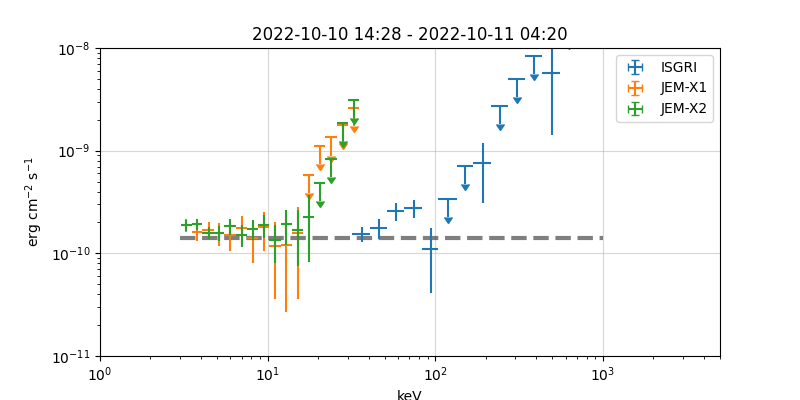

In [208]:
import ogip.tools

import importlib
importlib.reload(ogip.tools)
from astropy import units as u


from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec



# isgri_pha = PHAI.from_file_name("IBIS_spectrum_GRB221009A.fits")
# isgri_rmf = RMF.from_file_name("IBIS_rmf_GRB221009A.fits")

isgri_pha_rebinned, isgri_rmf_rebinned = rebin(isgri_pha, isgri_rmf, log_bins(10, 25, 700))

spi_pha_rebinned, spi_rmf_rebinned = rebin(spi_pha, spi_rmf, log_bins(3, 25, 1000))
# spi_pha_rebinned, spi_rmf_rebinned = rebin(spi_pha, spi_rmf, log_bins(5, 25, 600))


model = lambda x:(7e-5*(x/25.)**-2)

import logging
logger = logging.getLogger()

def model_generator(p):
    logger.debug("generating model for %s", p)

    def mdl(x):
        logger.debug("evaluating model for %s", p)
        if len(p) == 1:
            return (p[0]*(x/25.)**-2)
        else:
            return (p[0]*(x/25.)**p[1])

    return mdl



allspec = [
    (jmx1_pha, jmx1_rmf, jmx1_arf, (jmx1_rmf._e_min > 2) & (jmx1_rmf._e_min < 15)),
    (jmx2_pha, jmx2_rmf, jmx2_arf, (jmx2_rmf._e_min > 2) & (jmx2_rmf._e_min < 15)),
    (isgri_pha, isgri_rmf, None, (isgri_rmf._e_min > 28) & (isgri_rmf._e_min < 200)),
    (spi_pha, spi_rmf, None, (spi_rmf._e_min > 15) & (spi_rmf._e_min < 300)),
]

import emcee

p0 = [1e-9, -2]
nwalkers = 100
nsampler = 10



# fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-5, -1.9], jmx1_pha, jmx1_rmf, None, 
#                                           mask=(jmx1_rmf._e_min > 5) & (jmx1_rmf._e_min < 20))

# model_generator = lambda p:(lambda x:(p[0]*(x/25.)**-2))
# fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-10], isgri_pha, isgri_rmf, None, 
#                                           mask=(isgri_rmf._e_min > 35) & (isgri_rmf._e_min < 100))


# model_generator = lambda p:(lambda x:(p[0]*(x/25.)**-2))
fit_result, fitted_model = ogip.tools.fit(model_generator, [1e-9, -2], 
                                          allspec,
                                        #   method='L-BFGS-B'
                                          method='L-BFGS-B'
                                          )

print(fit_result)        

model = fitted_model                                        

ogip.tools.convolve(fitted_model, jmx1_rmf, jmx1_arf)

for unfolded in True, False:
# for unfolded in False,:
    f = plt.figure(figsize=(8, 4))

    
# for unfolded in False, :
    e_power = 2 if unfolded else 0

    import numpy as np
    en = np.logspace(np.log10(3), 3)
    plt.plot(en, fitted_model(en)*en**2*u.keV.to(u.erg), lw=3, c='k', alpha=0.5, ls="--")

    from astropy import units as u
    erg_in_keV = u.keV.to(u.erg)

    # plot_spec(isgri_pha, model, isgri_rmf, fig=f, label_prefix="ISGRI", unfolded=unfolded, e_power=e_power)
    plot_spec(isgri_pha_rebinned, model, isgri_rmf_rebinned, fig=f, unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV,
            plot_kwargs=dict(label="ISGRI"))

    isgri_pha_rebinned.to_fits("isgri_rebinned_pha.fits")
    isgri_rmf_rebinned.to_fits("isgri_rebinned_rmf.fits")

    # plot_spec(spi_pha_rebinned, model, spi_rmf_rebinned, fig=f, label_prefix="SPI", unfolded=unfolded, e_power=e_power)

    if 'r25589' in focus_obs_name:
        plot_spec(spi_pha, model, spi_rmf, fig=f, plot_kwargs=dict(label="SPI"), unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV)
            
    plot_spec(jmx1_pha, model, jmx1_rmf, arf=jmx1_arf, fig=f, unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV, 
            plot_kwargs=dict(label="JEM-X1"))
    plot_spec(jmx2_pha, model, jmx2_rmf, arf=jmx2_arf, fig=f, label_prefix="JMX2", unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV,
            plot_kwargs=dict(label="JEM-X2"))

    # early and total jemxX spec are weird

    if unfolded:
        plt.ylabel(f"erg cm$^{{-2}}$ s$^{{-1}}$" + (f" keV$^{{{e_power-2}}}$" if e_power!=2 else ""))
    else:
        plt.ylabel("counts/s/keV")

    plt.xlabel("keV")

    plt.xlim([1, 5e3])
    plt.ylim([1e-11, 1e-8])
    # plt.loglog()

    plt.grid(alpha=0.5)

    # plt.title(f"{focus_obs_name} {spec2isot12(jmx1_pha)}\n {spec2isot12(isgri_pha)} {fit_result.x} {fitted_model}")
    t1, t2 = spec2isot12(jmx1_pha)
    t2pl = lambda t:t.replace("T", " ")[:16]
    plt.title(f"{t2pl(t1)} - {t2pl(t2)}")

    plt.legend()




    fn_png = f"spec_afterglow_counts_{'un' if unfolded else ''}folded.png"
    plt.savefig(fn_png.replace(".png", ".pdf"))
    plt.savefig(fn_png)


from IPython.display import Image
Image("spec_afterglow_counts_unfolded.png")
# Image("spec_afterglow_counts_folded.png")

    # TODO: add in grey other data
    # TODO: plot by period

In [266]:
f0 = np.log10(fit_result.x[0])

def model_with_pars(x, p):    
    logger.debug("evaluating model for %s", p)
    if len(p) == 1:
        return (10**p[0]*(x/25.)**-2)
    else:
        return (10**p[0]*(x/25.)**p[1])
    

importlib.reload(ogip.tools)

r = ogip.tools.sample(model_with_pars, p0=[(f0, f0 - 0.3, f0 + 0.3), (-2, -2.5, -1.5)], spectra=allspec, nsteps=sampler_steps, nwalkers=50, n_processes=1)

tau = r.get_autocorr_time(tol=10)

flat_samples = r.get_chain(discard=int(max(tau))*2, thin=15, flat=True)

(50, 2) 2


  0%|          | 0/500 [00:00<?, ?it/s]/home/savchenk/miniconda-recent/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 500/500 [03:03<00:00,  2.72it/s]


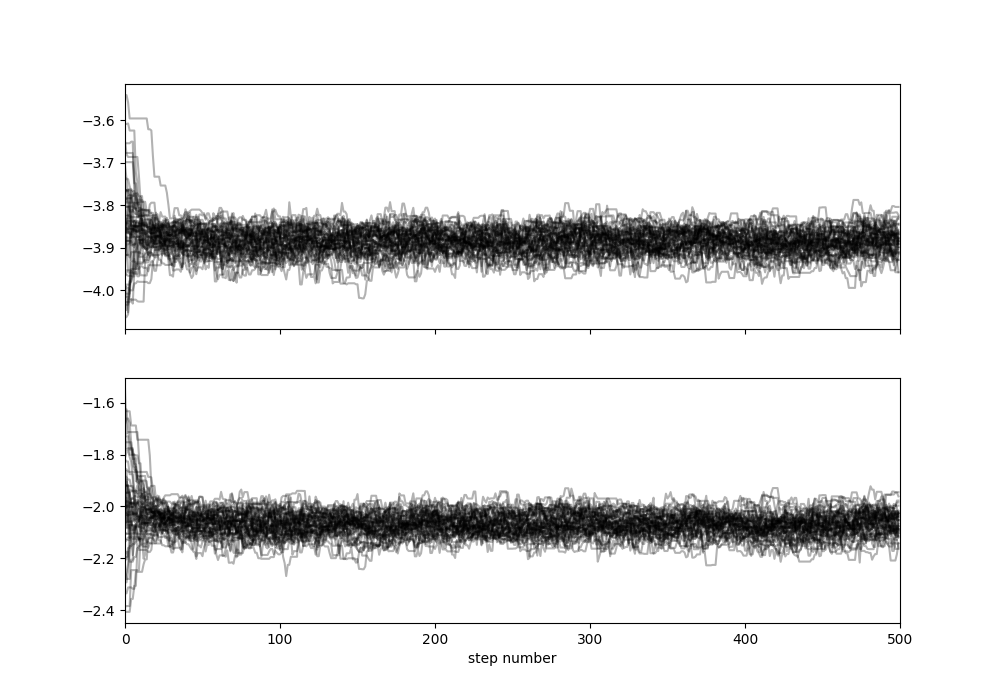

In [267]:
importlib.reload(ogip.tools)
ogip.tools.plot_chain(r)
plt.savefig("chain.png")
Image("chain.png")

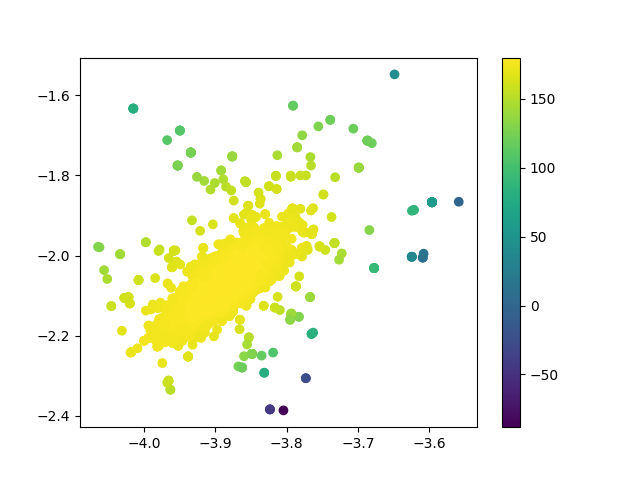

In [268]:
plt.figure()

m = r.flatlnprobability > -500

plt.scatter(
    r.flatchain[m,0],
    r.flatchain[m,1],
    c=r.flatlnprobability[m]
)

plt.colorbar()

plt.savefig("corner.png")
Image("corner.png")


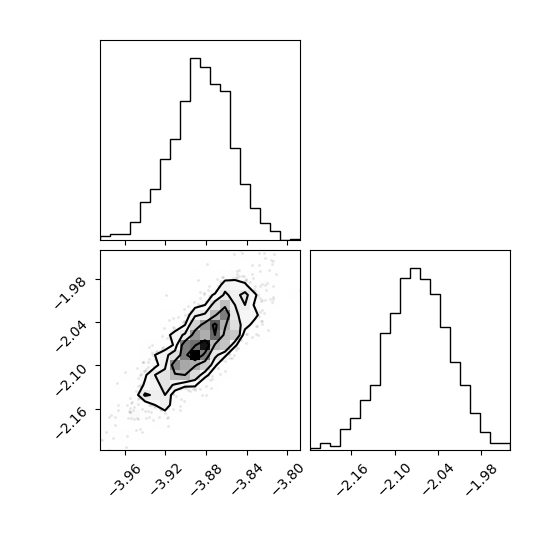

In [270]:
from corner import corner

corner(flat_samples)
plt.savefig("corner.png")
Image("corner.png")

In [273]:
from scipy.integrate import quad

def flux_for_pars(p, e1=3, e2=200):
    return quad(lambda x:model_with_pars(x, p)*x*u.keV.to(u.erg), e1, e2)[0]

fluxes = [flux_for_pars(p) for p in flat_samples]
peak = flux_for_pars(r.flatchain[np.argmax(r.lnprobability)])

flux_3_200_keV_ecs = {
    'mean': peak,
    'stat_err_minus': peak - np.percentile(fluxes, 5),
    'stat_err_plus': - peak + np.percentile(fluxes, 95),
}

flux_3_200_keV_ecs 

{'mean': 5.751815468014967e-10,
 'stat_err_minus': 8.075173707096819e-11,
 'stat_err_plus': 3.581306823923505e-11}

In [293]:
fit_pars = {}

for n, m, p in zip(["N", "slope"], np.mean(flat_samples, axis=0), np.percentile(flat_samples, (5, 95), axis=0).transpose()):
    print(n, m, p)
    fit_pars[n] = {
        'mean': m,
        'stat_err_minus': m - p[0],
        'stat_err_plus': - m + p[1],
    }

fit_pars

N -3.8852135364036693 [-3.93594838 -3.83840533]
slope -2.0695589070697284 [-2.14585753 -1.99646492]


{'N': {'mean': -3.8852135364036693,
  'stat_err_minus': 0.050734846149692814,
  'stat_err_plus': 0.04680820742948644},
 'slope': {'mean': -2.0695589070697284,
  'stat_err_minus': 0.07629862464915327,
  'stat_err_plus': 0.07309398851978144}}

In [9]:
if focus_obs_name == "r2558":
    """
    Parameter   Confidence Range (2.706)
     1      1.98567      2.13624    (-0.0718247,0.0787513)

    Error range   0.02757 - 0.02998    (4.498e-10 - 5.034e-10)  (68.00% confidence)
    """

In [10]:
sn_max = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn_total = 0 # np.sum(d['RATE']) / np.sum(d['STAT_ERR']**2)**0.5
exposure = 0 # spec[2].header['EXPOSURE']
ag_spec="spec_afterglow_counts_unfolded.pdf"
flux_3_200_keV_ecs=flux_3_200_keV_ecs
fit_pars=fit_pars